## TP 1 - Computer Vision

In [99]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

### Parte 1

#### 1) Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [100]:
path_coord_cromaticas = r'C:\Users\Leandro\Documents\GitHub\vision_computadora_I\Material_TPs\TP1\coord_cromaticas'
path_white_patch = r'C:\Users\Leandro\Documents\GitHub\vision_computadora_I\Material_TPs\TP1\white_patch'

In [101]:
imgs_coord_cromaticas = ['\CoordCrom_1.png', '\CoordCrom_2.png', '\CoordCrom_3.png']
imgs_white_patch = ['\\test_blue.png', '\\test_green.png', '\\test_red.png', '\\wp_blue.jpg', 
                    '\\wp_green.png', '\\wp_green2.jpg', '\\wp_red.png', '\\wp_red2.jpg']

In [102]:
# Cargo las imágenes
img_cc1 = cv.imread(path_coord_cromaticas + imgs_coord_cromaticas[0])[:,:,::-1]
img_cc2 = cv.imread(path_coord_cromaticas + imgs_coord_cromaticas[1])[:,:,::-1]
img_cc3 = cv.imread(path_coord_cromaticas + imgs_coord_cromaticas[2])[:,:,::-1]

In [103]:
# Creo la función
def chromatic_coord(img):
    res = img.copy().astype(float)
    dim1 = img.shape[0]
    dim2 = img.shape[1]
    channel1 = res[:,:,0]
    channel2 = res[:,:,1]
    channel3 = res[:,:,2]
    for i in range(dim1):
        for j in range(dim2):
            total = channel1[i,j] + channel2[i,j] + channel3[i,j]
            if total == 0:
                channel1[i,j] = 0
                channel2[i,j] = 0
                channel3[i,j] = 0
            else:                
                channel1[i,j] = channel1[i,j] / total
                channel2[i,j] = channel2[i,j] / total
                channel3[i,j] = channel3[i,j] / total 
    return res

In [104]:
# Aplico las correcciones a las imágenes
cc_img_cc1 = chromatic_coord(img_cc1)
cc_img_cc2 = chromatic_coord(img_cc2)
cc_img_cc3 = chromatic_coord(img_cc3)

#### 2) Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [105]:
# Cargo las imágenes
img_hand_blue = cv.imread(path_white_patch + imgs_white_patch[0])[:,:,::-1]
img_hand_green = cv.imread(path_white_patch + imgs_white_patch[1])[:,:,::-1]
img_hand_red = cv.imread(path_white_patch + imgs_white_patch[2])[:,:,::-1]
img_dep_blue = cv.imread(path_white_patch + imgs_white_patch[3])[:,:,::-1]
img_dep_green = cv.imread(path_white_patch + imgs_white_patch[4])[:,:,::-1]
img_dep_green2 = cv.imread(path_white_patch + imgs_white_patch[5])[:,:,::-1]
img_dep_red = cv.imread(path_white_patch + imgs_white_patch[6])[:,:,::-1]
img_dep_red2 = cv.imread(path_white_patch + imgs_white_patch[7])[:,:,::-1]

In [106]:
# Creo la función
def white_patch(img):
    res = img.copy()
    max1 = max(res[:,:,0].flatten())
    max2 = max(res[:,:,1].flatten())
    max3 = max(res[:,:,2].flatten())
    res[:,:,0] = np.round(255 / max1 * res[:,:,0], 0).astype(int)
    res[:,:,1] = np.round(255 / max2 * res[:,:,1], 0).astype(int)
    res[:,:,2] = np.round(255 / max3 * res[:,:,2], 0).astype(int)
    return res

In [107]:
# Aplico las correcciones a las imágenes de las manos
wp_img_hand_blue = white_patch(img_hand_blue)
wp_img_hand_green = white_patch(img_hand_green)
wp_img_hand_red = white_patch(img_hand_red)

In [108]:
# Aplico las correcciones a las imágenes de Depredador
wp_img_dep_blue = white_patch(img_dep_blue)
wp_img_dep_green = white_patch(img_dep_green)
wp_img_dep_green2 = white_patch(img_dep_green2)
wp_img_dep_red = white_patch(img_dep_red)
wp_img_dep_red2 = white_patch(img_dep_red2)

#### 3) Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White Patch.

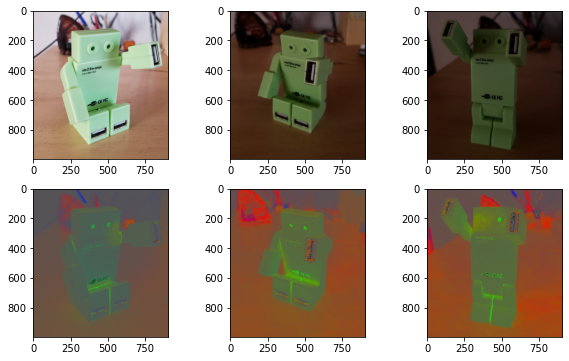

In [109]:
# Muestro las imágenes (Coordenadas cromáticas)
fig, axs = plt.subplots(2, 3, figsize = (10,6))
axs[0,0].imshow(img_cc1)
axs[0,1].imshow(img_cc2)
axs[0,2].imshow(img_cc3)
axs[1,0].imshow(cc_img_cc1)
axs[1,1].imshow(cc_img_cc2)
axs[1,2].imshow(cc_img_cc3)
plt.show()

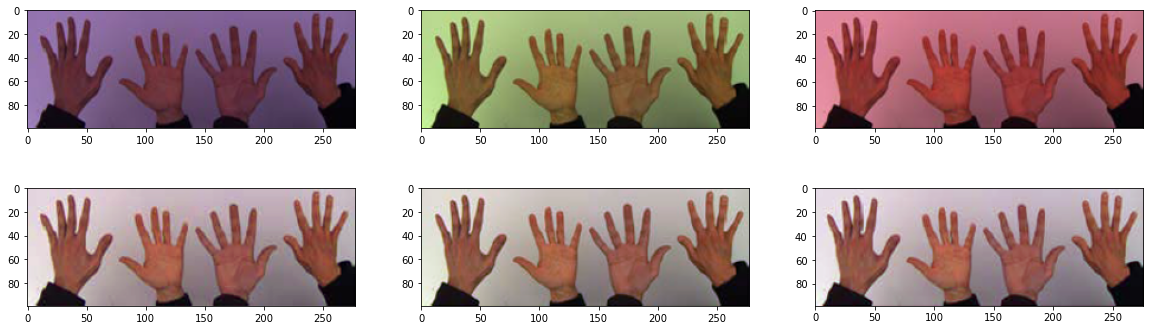

In [110]:
# Muestro las imágenes (White Patch)
fig, axs = plt.subplots(2, 3, figsize = (20,6))
axs[0,0].imshow(img_hand_blue)
axs[0,1].imshow(img_hand_green)
axs[0,2].imshow(img_hand_red)
axs[1,0].imshow(wp_img_hand_blue)
axs[1,1].imshow(wp_img_hand_green)
axs[1,2].imshow(wp_img_hand_red)
plt.show()

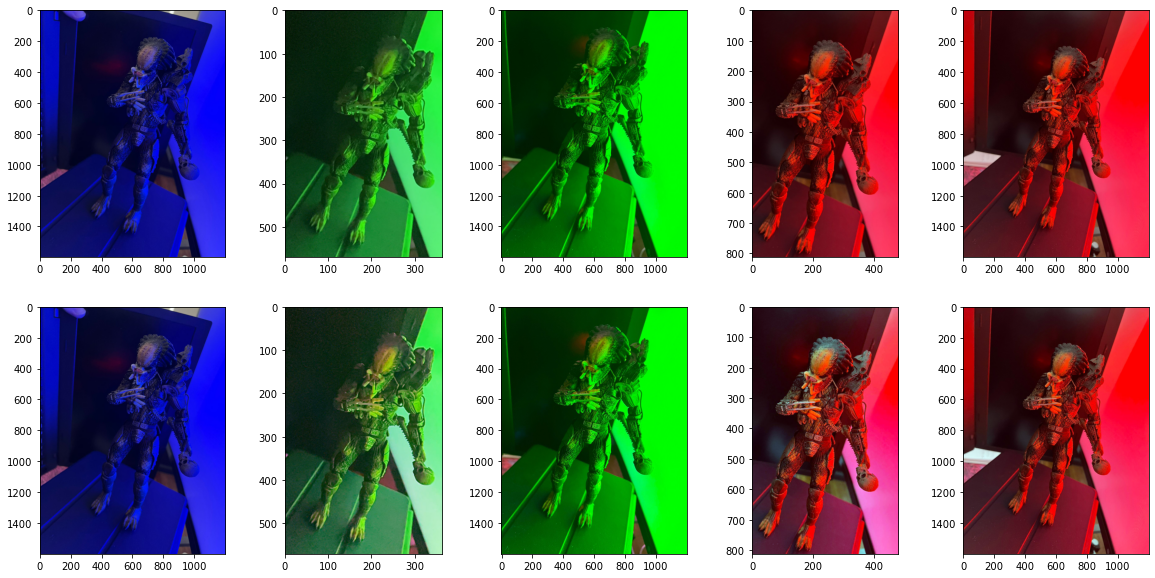

In [111]:
# Muestro las imágenes (White Patch)
fig, axs = plt.subplots(2, 5, figsize = (20,10))
axs[0,0].imshow(img_dep_blue)
axs[0,1].imshow(img_dep_green)
axs[0,2].imshow(img_dep_green2)
axs[0,3].imshow(img_dep_red)
axs[0,4].imshow(img_dep_red2)

axs[1,0].imshow(wp_img_dep_blue)
axs[1,1].imshow(wp_img_dep_green)
axs[1,2].imshow(wp_img_dep_green2)
axs[1,3].imshow(wp_img_dep_red)
axs[1,4].imshow(wp_img_dep_red2)
plt.show()

En la parte superior estás las imágenes originales, y en la fila inferior están las modificadas por white patch. Se puede ver cómo se reavivaron ligeramente algunos tonos luego de la aplicación del algoritmo. A continuación, vamos a visualizar los histogramas de las imágenes originales.

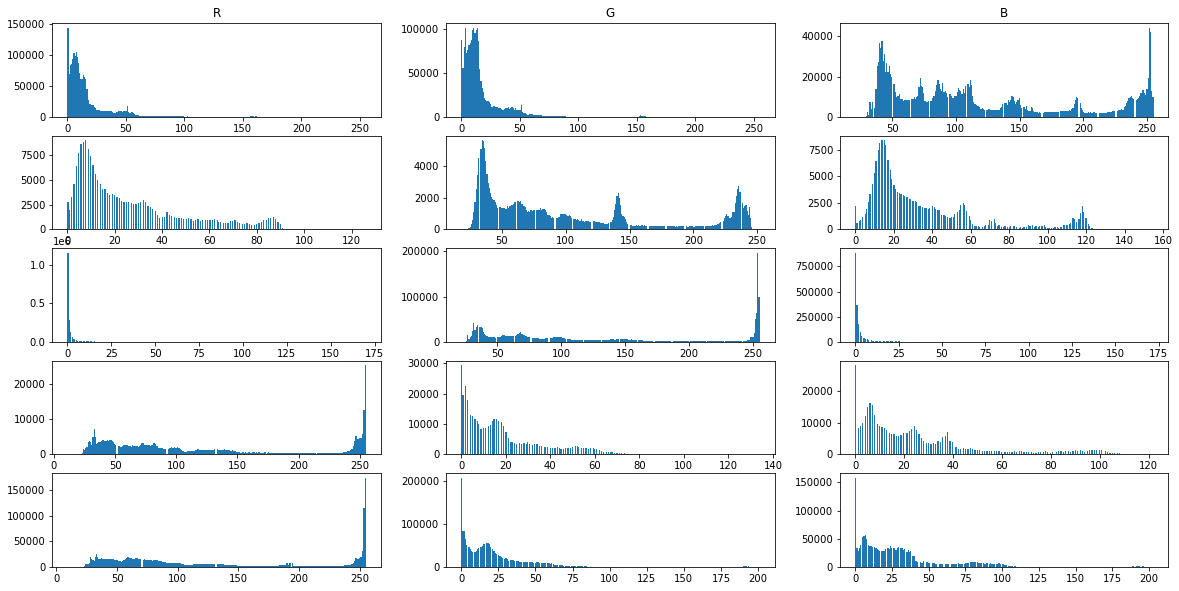

In [112]:
# Calculo los histogramas de Depredador (imágenes originales)
fig, axs = plt.subplots(5, 3, figsize = (20,10))
axs[0,0].hist(img_dep_blue[:,:,0].flatten(), bins = 250)
axs[0,1].hist(img_dep_blue[:,:,1].flatten(), bins = 250)
axs[0,2].hist(img_dep_blue[:,:,2].flatten(), bins = 250)
axs[0,0].set_title('R')
axs[0,1].set_title('G')
axs[0,2].set_title('B')

axs[1,0].hist(img_dep_green[:,:,0].flatten(), bins = 250)
axs[1,1].hist(img_dep_green[:,:,1].flatten(), bins = 250)
axs[1,2].hist(img_dep_green[:,:,2].flatten(), bins = 250)

axs[2,0].hist(img_dep_green2[:,:,0].flatten(), bins = 250)
axs[2,1].hist(img_dep_green2[:,:,1].flatten(), bins = 250)
axs[2,2].hist(img_dep_green2[:,:,2].flatten(), bins = 250)

axs[3,0].hist(img_dep_red[:,:,0].flatten(), bins = 250)
axs[3,1].hist(img_dep_red[:,:,1].flatten(), bins = 250)
axs[3,2].hist(img_dep_red[:,:,2].flatten(), bins = 250)

axs[4,0].hist(img_dep_red2[:,:,0].flatten(), bins = 250)
axs[4,1].hist(img_dep_red2[:,:,1].flatten(), bins = 250)
axs[4,2].hist(img_dep_red2[:,:,2].flatten(), bins = 250)

plt.show()

Se puede notar cómo en las imágenes verdes (histogramas 2 y 3) y las imágenes rojas (histogramas 4 y 5), los canales no correspondientes al color de la imagen están descontinuados. Es decir, en la imagen verde (por ejemplo), los canales rojo y azul no tienen transición, sino más bien valores discretos. Se puede inferir que fueron modificadas para contener menor colores.

En los histogramas de arriba se ve cómo hay valores aislados muy altos en algunos canales, lo que impide que se escale con mayor rango. Se van a alterar esos valores para corregir el escalado. Se va a trabajar sólo con la última imagen (foto roja 2) a modo de ejemplo.

In [113]:
# Establezco un umbral máximo de 100 para el canal G.
dim1 = img_dep_red2[:,:,1].shape[0]
dim2 = img_dep_red2[:,:,1].shape[1]
g = img_dep_red2[:,:,1].flatten()
g_fix = np.array([min(g[i], 100) for i in range(dim1*dim2)])
new_g = g_fix.reshape(dim1, dim2)

In [114]:
# Establezco un umbral máximo de 125 para el canal B.
dim1 = img_dep_red2[:,:,2].shape[0]
dim2 = img_dep_red2[:,:,2].shape[1]
b = img_dep_red2[:,:,2].flatten()
b_fix = np.array([min(b[i], 125) for i in range(dim1*dim2)])
new_b = b_fix.reshape(dim1, dim2)

In [115]:
# Aplico modificaciones en imagen.
new_red = img_dep_red2.copy()
new_red[:,:,1] = new_g
new_red[:,:,2] = new_b

In [116]:
# Aplico las correcciones a las imagen de Depredador modificada.
wp_img_new_red = white_patch(new_red)

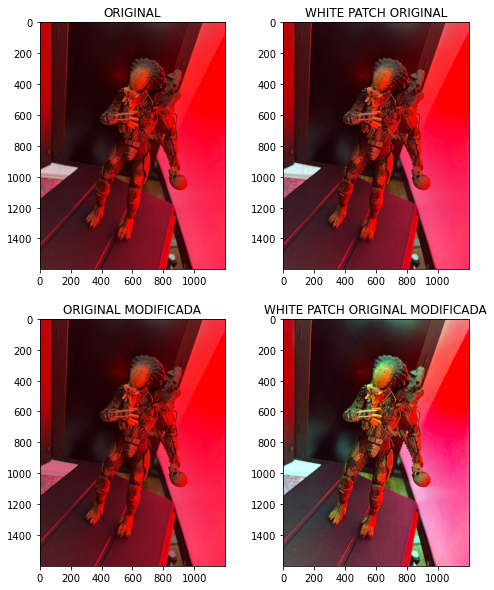

In [117]:
# Muestro las imágenes modificadas (White Patch)
fig, axs = plt.subplots(2,2, figsize = (8,10))
axs[0,0].imshow(img_dep_red2)
axs[0,0].set_title('ORIGINAL')
axs[0,1].imshow(wp_img_dep_red2)
axs[0,1].set_title('WHITE PATCH ORIGINAL')
axs[1,0].imshow(new_red)
axs[1,0].set_title('ORIGINAL MODIFICADA')
axs[1,1].imshow(wp_img_new_red)
axs[1,1].set_title('WHITE PATCH ORIGINAL MODIFICADA')
plt.show()

Podemos ver que la imagen roja original no cambió casi nada (no se percibe ninguna diferencia a simple vista). Sin embargo, las imágenes white patch cambiaron notoriamente, reviviendo los tonos más verdes.

Respecto de la imágenes de las manos, una observación para hacer es que parece que las imágenes corregidas por white patch son iguales, o parecidas al menos. Podemos tener una idea de esto si calculamos las normas de las matrices y vemos cuáles son más cercanas entre sí. Por ejemplo, a continuación comparamos las imágenes (matrices) azul y verde, antes y después del white patch.

In [118]:
# Calculamos las normas de las matrices (imágenes)
blue_green = img_hand_blue - img_hand_green
wp_blue_green = wp_img_hand_blue - wp_img_hand_green

norm_blue_green = np.linalg.norm(blue_green)
norm_wp_blue_green = np.linalg.norm(wp_blue_green)

norm_blue_green > norm_wp_blue_green

True

Acá verificamos que son más 'cercanas' las imágenes luego del white patch.

### Parte 2

#### 1) Para las imágenes img1_pt.png y img2_tp.png, leerlas con OpenCV en escala de grises y visualizarlas.

In [119]:
path = r'C:\Users\Leandro\Documents\GitHub\vision_computadora_I\Material_TPs\TP1'

In [120]:
# Cargo las imágenes
img1 = cv.imread(path + '\img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread(path + '\img2_tp.png', cv.IMREAD_GRAYSCALE)

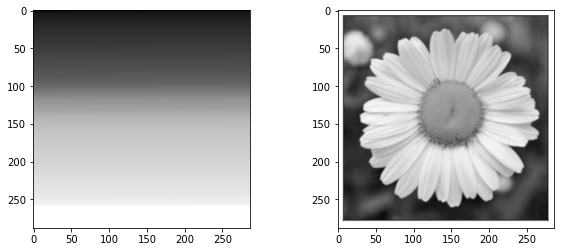

In [121]:
# Muestro las imágenes
fig, axs = plt.subplots(1,2, figsize = (10, 4))
axs[0].imshow(img1, cmap = 'gray')
axs[1].imshow(img2, cmap = 'gray')
plt.show()

#### 2) Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre sí. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación / detección de imágenes, ¿considera que puede ser de utilidad tomar como 'features' a los histogramas?

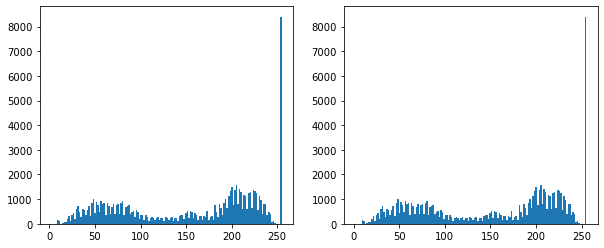

In [122]:
# Muestro las histogramas
fig, axs = plt.subplots(1,2, figsize = (10, 4))
axs[0].hist(img1.flatten(), bins = 150)
axs[1].hist(img2.flatten(), bins = 150)
plt.show()

Al parecer son los mismos histogramas. Vamos a ver si son exactamente los mismos.

In [123]:
# Creo dicionario para contar repeticiones de valores
unique1, counts1 = np.unique(img1.flatten(), return_counts = True)
count_dic1 = dict(zip(unique1, counts1))
unique2, counts2 = np.unique(img2.flatten(), return_counts = True)
count_dic2 = dict(zip(unique2, counts2))
count_dic1 == count_dic2

True

Comparé ambos diccionarios y dieron lo mismo. Por lo tanto, los histogramas son literalmente iguales.

Las imágenes son muy distintas, sin embargo, los histogramas son iguales. Esto es porque el histograma cuenta la cantidad de valores repetidos, sin importar la distribución. Y una imagen, en definitiva, es una distribución de valores en una matriz. No parece ser buena idea ver solo el histograma como feature para entrenar un modelo.

#### 3) Para la imagen segementacion.png, analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imágenes separadas.

In [124]:
# Cargo la imagen
img3 = cv.imread(path + '\segmentacion.png')[:,:,::-1]

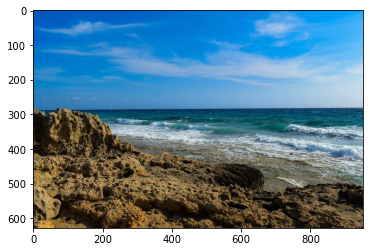

In [125]:
# Muestro la imagen
plt.imshow(img3)
plt.show()

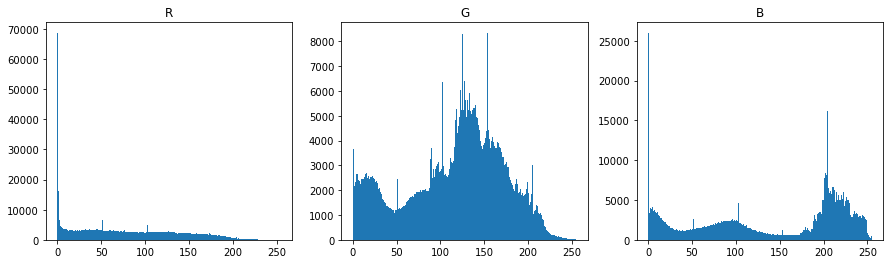

In [126]:
# Muestro las histogramas
fig, axs = plt.subplots(1,3, figsize = (15, 4))
axs[0].hist(img3[:,:,0].flatten(), bins = 250)
axs[0].set_title('R')
axs[1].hist(img3[:,:,1].flatten(), bins = 250)
axs[1].set_title('G')
axs[2].hist(img3[:,:,2].flatten(), bins = 250)
axs[2].set_title('B')
plt.show()

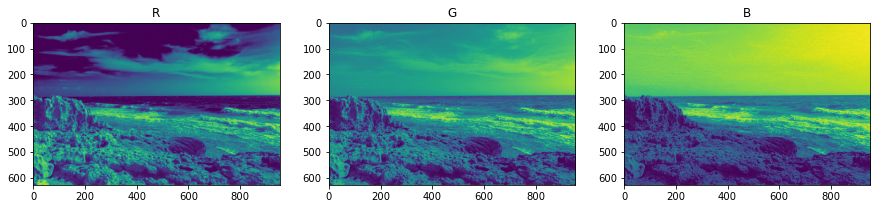

In [127]:
# Muestro la imagen por canal
fig, axs = plt.subplots(1,3, figsize = (15, 4))
axs[0].imshow(img3[:,:,0])
axs[0].set_title('R')
axs[1].imshow(img3[:,:,1])
axs[1].set_title('G')
axs[2].imshow(img3[:,:,2])
axs[2].set_title('B')
plt.show()

El canal R es el menos uniforme en la distribución de valores, dado que la gran mayoría son valores nulos (negros). Por el contrario, el más distribuido es el canal G, con los mayores valores en el rango de los tonos medios. Por último, el canal B también tiene la mayor parte en valores nulos, pero también tiene muchos tonos blancos (cielo y espuma del agua).

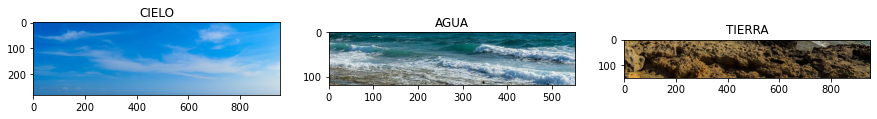

In [128]:
# Separo en cielo, agua y tierra
cielo = img3[:280,:,:]
agua = img3[300:420,400:,:]
tierra = img3[480:,:,:]

fig, axs = plt.subplots(1,3, figsize = (15, 4))
axs[0].imshow(cielo)
axs[0].set_title('CIELO')
axs[1].imshow(agua)
axs[1].set_title('AGUA')
axs[2].imshow(tierra)
axs[2].set_title('TIERRA')
plt.show()

In [129]:
# Calculo la media y el desvío de cada muestra
color_mean_cielo, color_std_cielo = cv.meanStdDev(cielo)
color_mean_agua, color_std_agua = cv.meanStdDev(agua)
color_mean_tierra, color_std_tierra = cv.meanStdDev(tierra)

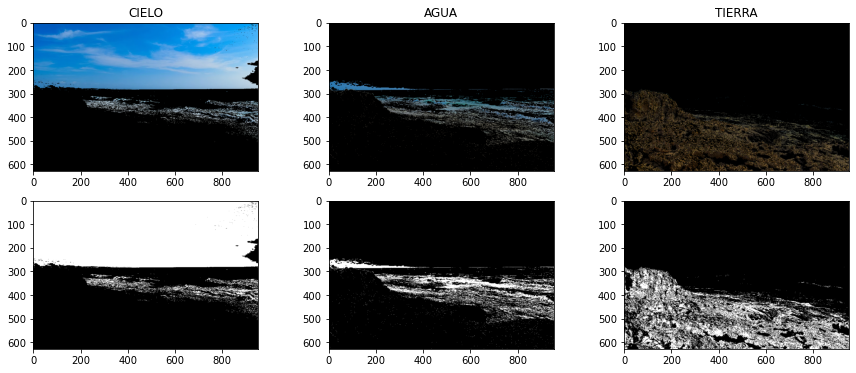

In [130]:
# Eleijo desvíos diferentes para cada máscara
n_sigma_cielo = 2.2
n_sigma_agua = 0.8
n_sigma_tierra = 1

mask_cielo = cv.inRange(img3, color_mean_cielo - color_std_cielo * n_sigma_cielo,  color_mean_cielo + color_std_cielo * n_sigma_cielo)
mask_agua = cv.inRange(img3, color_mean_agua - color_std_agua * n_sigma_agua,  color_mean_agua + color_std_agua * n_sigma_agua)
mask_tierra = cv.inRange(img3, color_mean_tierra - color_std_tierra * n_sigma_tierra,  color_mean_tierra + color_std_tierra * n_sigma_tierra)

img_segmentada_cielo = cv.bitwise_and(img3, img3, mask = mask_cielo)
img_segmentada_agua = cv.bitwise_and(img3, img3, mask = mask_agua)
img_segmentada_tierra = cv.bitwise_and(img3, img3, mask = mask_tierra)

fig, axs = plt.subplots(2,3, figsize = (15, 6))
axs[0,0].imshow(img_segmentada_cielo)
axs[1,0].imshow(mask_cielo, cmap = 'gray')
axs[0,0].set_title('CIELO')

axs[0,1].imshow(img_segmentada_agua)
axs[1,1].imshow(mask_agua, cmap = 'gray')
axs[0,1].set_title('AGUA')

axs[0,2].imshow(img_segmentada_tierra)
axs[1,2].imshow(mask_tierra, cmap = 'gray')
axs[0,2].set_title('TIERRA')

plt.show()

Acá pudimos separar en cielo, agua y tierra. La más difícil de identificar es el agua, porque se confunde con el cielo, pero se logró capturar bastante bien la zona en donde está presente el agua.

In [131]:
#cv.imshow('image', cc_img_cc2)
#cv.waitKey(0)
#cv.destroyAllWindows()